<a href="https://colab.research.google.com/github/ffalo64/rabbit_challenge/blob/main/2_10_layer_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# モジュールのロード

In [1]:
!pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 5.5 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# データのロード

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255
x_test = x_test / 255
y_train = tf.one_hot(y_train.reshape(len(y_train)), depth=10)
y_test = tf.one_hot(y_test.reshape(len(y_test)), depth=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 17s 0us/step
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [4]:
index2label = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

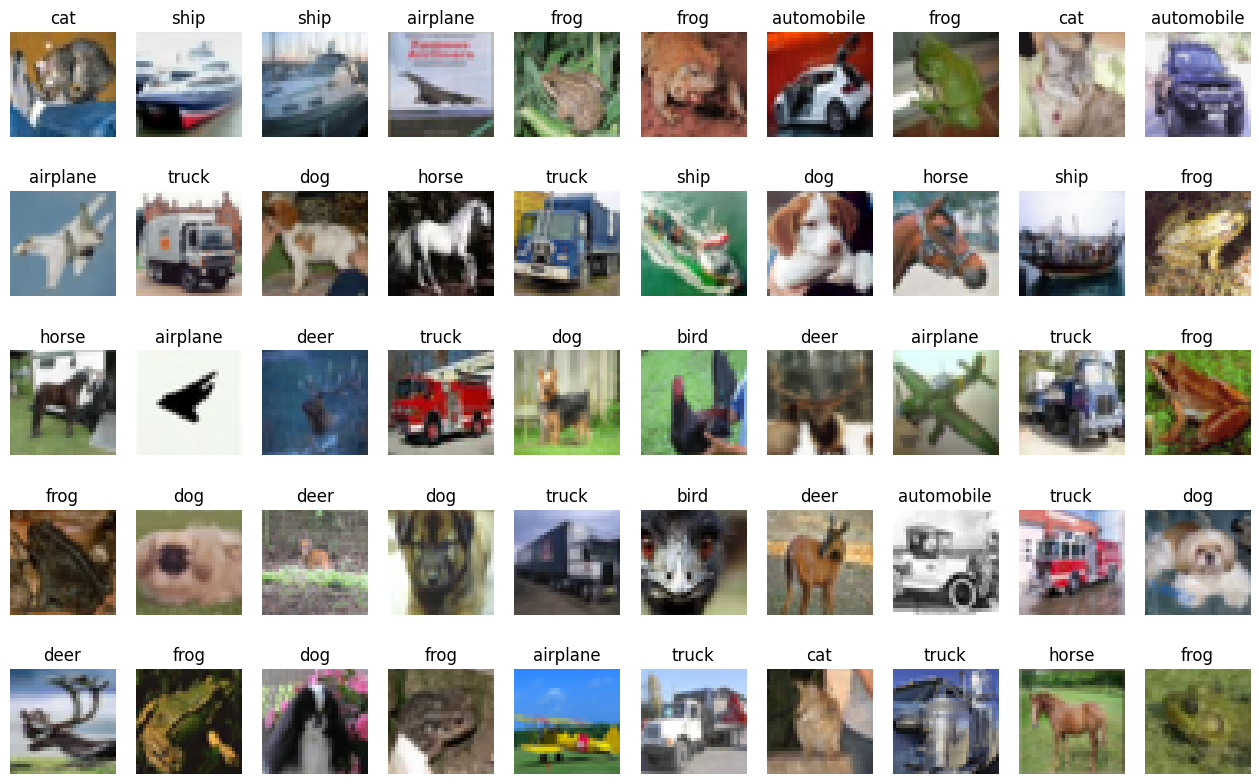

In [5]:
import matplotlib.pyplot as plt
import random

index = 0
count = 50

plt.figure(figsize=(16, 10))

for i, img in enumerate(x_test[index:index+count]):
    plt.subplot(5, 10, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(index2label[np.argmax(y_test[i])])

plt.show()

# ベースモデルでの実行(正規化レイヤーなし)

In [6]:
epochs = 5
batch_size = 256

In [7]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [8]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 512)               3686912   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

In [9]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 14s 18ms/step - loss: 1.5622 - acc: 0.4425 - val_loss: 1.2937 - val_acc: 0.5472
Epoch 2/5
196/196 [==============================] - 3s 13ms/step - loss: 1.1408 - acc: 0.5999 - val_loss: 1.0620 - val_acc: 0.6318
Epoch 3/5
196/196 [==============================] - 3s 13ms/step - loss: 0.9705 - acc: 0.6616 - val_loss: 0.9822 - val_acc: 0.6576
Epoch 4/5
196/196 [==============================] - 3s 13ms/step - loss: 0.8708 - acc: 0.6964 - val_loss: 0.9302 - val_acc: 0.6758
Epoch 5/5
196/196 [==============================] - 2s 12ms/step - loss: 0.7787 - acc: 0.7299 - val_loss: 0.9358 - val_acc: 0.6792


# 正規化レイヤーあり

## Batch正規化

1層目のCNNの後にBatch正規化を適用した場合の例です。

In [10]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [11]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [12]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 5s 17ms/step - loss: 1.7489 - acc: 0.4199 - val_loss: 1.8563 - val_acc: 0.4764
Epoch 2/5
196/196 [==============================] - 3s 15ms/step - loss: 1.1152 - acc: 0.6065 - val_loss: 1.3459 - val_acc: 0.5962
Epoch 3/5
196/196 [==============================] - 3s 14ms/step - loss: 0.9140 - acc: 0.6803 - val_loss: 1.0045 - val_acc: 0.6512
Epoch 4/5
196/196 [==============================] - 3s 14ms/step - loss: 0.7968 - acc: 0.7206 - val_loss: 0.9446 - val_acc: 0.6683
Epoch 5/5
196/196 [==============================] - 3s 14ms/step - loss: 0.6949 - acc: 0.7585 - val_loss: 0.9346 - val_acc: 0.6805


## Layer正規化

1層目のCNNの後にLayer正規化を適用した場合の例です。

In [13]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.LayerNormalization(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [14]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 layer_normalization (LayerN  (None, 32, 32, 32)       64        
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 7200)              0         
                                                                 
 dense_4 (Dense)             (None, 512)              

In [15]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 10s 41ms/step - loss: 1.5560 - acc: 0.4564 - val_loss: 1.1967 - val_acc: 0.5644
Epoch 2/5
196/196 [==============================] - 7s 38ms/step - loss: 1.0362 - acc: 0.6331 - val_loss: 1.0396 - val_acc: 0.6280
Epoch 3/5
196/196 [==============================] - 7s 37ms/step - loss: 0.7749 - acc: 0.7285 - val_loss: 1.0161 - val_acc: 0.6539
Epoch 4/5
196/196 [==============================] - 8s 39ms/step - loss: 0.5122 - acc: 0.8237 - val_loss: 0.9954 - val_acc: 0.6706
Epoch 5/5
196/196 [==============================] - 7s 38ms/step - loss: 0.2769 - acc: 0.9103 - val_loss: 1.1706 - val_acc: 0.6739


## Instance正規化

1層目のCNNの後にInstance正規化を適用した場合の例です。

In [16]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tfa.layers.InstanceNormalization(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [17]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 instance_normalization (Ins  (None, 32, 32, 32)       64        
 tanceNormalization)                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 7200)              0         
                                                                 
 dense_6 (Dense)             (None, 512)              

In [18]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 7s 22ms/step - loss: 1.7226 - acc: 0.4327 - val_loss: 1.1901 - val_acc: 0.5765
Epoch 2/5
196/196 [==============================] - 4s 20ms/step - loss: 1.0342 - acc: 0.6369 - val_loss: 0.9868 - val_acc: 0.6567
Epoch 3/5
196/196 [==============================] - 4s 20ms/step - loss: 0.8610 - acc: 0.6995 - val_loss: 0.9605 - val_acc: 0.6676
Epoch 4/5
196/196 [==============================] - 4s 20ms/step - loss: 0.7623 - acc: 0.7340 - val_loss: 0.9029 - val_acc: 0.6830
Epoch 5/5
196/196 [==============================] - 4s 19ms/step - loss: 0.6675 - acc: 0.7698 - val_loss: 0.8830 - val_acc: 0.6992


# 各正規化手法の比較

Batch正規化、Layer正規化、Instance正規化をぞれぞれ適用した場合の比較です。

In [19]:
def create_model(input_shape, class_num, norm_layer):
    if norm_layer:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
            norm_layer(),
            tf.keras.layers.Conv2D(32, 3, activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(class_num, activation='softmax'),
        ])
    else:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
            tf.keras.layers.Conv2D(32, 3, activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(class_num, activation='softmax'),
        ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [20]:
epochs = 10
batch_size = 256

norm_layers = [
                None,
                tf.keras.layers.BatchNormalization,
                tf.keras.layers.LayerNormalization,
                tfa.layers.InstanceNormalization
]

tf.random.set_seed(0) # 再現性を高めるために乱数シードを固定しています。
histories = []
for norm_layer in norm_layers:
    model = create_model(x_train.shape, 10, norm_layer)

    history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)
    histories.append(history)

Epoch 1/10
196/196 [==============================] - 4s 16ms/step - loss: 1.5339 - acc: 0.4573 - val_loss: 1.2528 - val_acc: 0.5607
Epoch 2/10
196/196 [==============================] - 3s 14ms/step - loss: 1.1212 - acc: 0.6075 - val_loss: 1.0758 - val_acc: 0.6257
Epoch 3/10
196/196 [==============================] - 3s 13ms/step - loss: 0.9521 - acc: 0.6672 - val_loss: 0.9869 - val_acc: 0.6543
Epoch 4/10
196/196 [==============================] - 2s 13ms/step - loss: 0.8413 - acc: 0.7074 - val_loss: 0.9573 - val_acc: 0.6630
Epoch 5/10
196/196 [==============================] - 2s 13ms/step - loss: 0.7427 - acc: 0.7434 - val_loss: 0.9328 - val_acc: 0.6751
Epoch 6/10
196/196 [==============================] - 3s 13ms/step - loss: 0.6490 - acc: 0.7768 - val_loss: 0.8987 - val_acc: 0.6873
Epoch 7/10
196/196 [==============================] - 3s 13ms/step - loss: 0.5463 - acc: 0.8134 - val_loss: 0.9428 - val_acc: 0.6870
Epoch 8/10
196/196 [==============================] - 3s 13ms/step - 

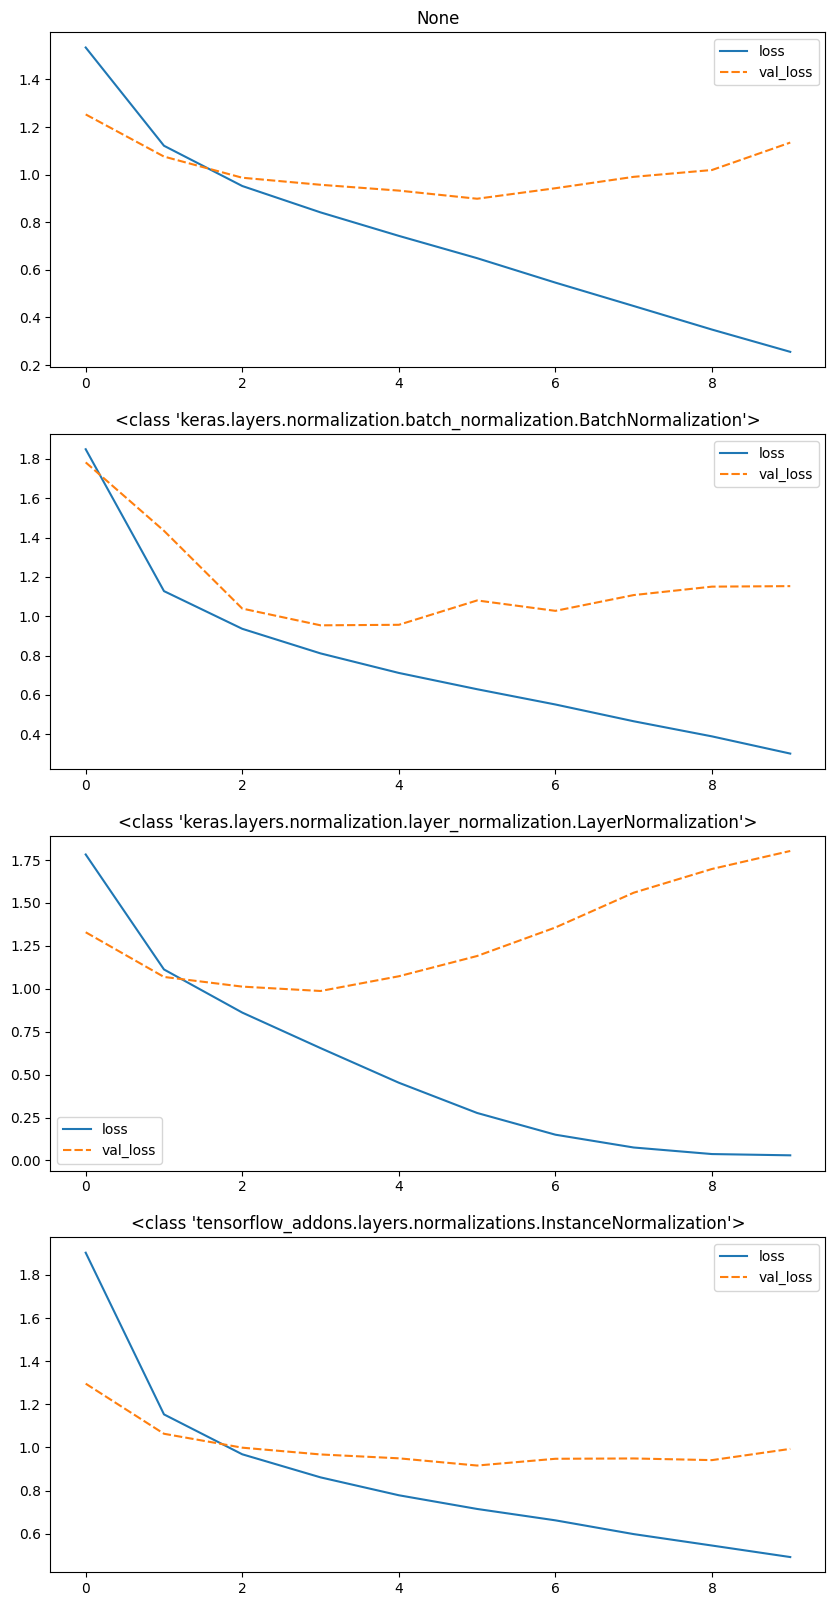

In [21]:
import pandas as pd
import seaborn as sns

fig = plt.figure(figsize=(10, 20))

for i, history in enumerate(histories):
    norm_layer_name = str(norm_layers[i])
    ax = fig.add_subplot(4, 1, i + 1)
    
    plot_df = pd.DataFrame(history.history)[['loss', 'val_loss']]
    sns.lineplot(data=plot_df, ax=ax)
    ax.set_title(norm_layer_name)